In [1]:
# !pip install yfinance
# !pip install tensorflow
# !pip install streamlit

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = "2013-01-01"
end = "2023-12-21"
stock = "GOOG"

data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...
2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800


In [5]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...,...
2757,2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
2758,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
2759,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800
2760,2023-12-19,138.000000,138.770004,137.449997,138.100006,138.100006,20661000


In [6]:
ma_100_days = data.Close.rolling(100).mean()

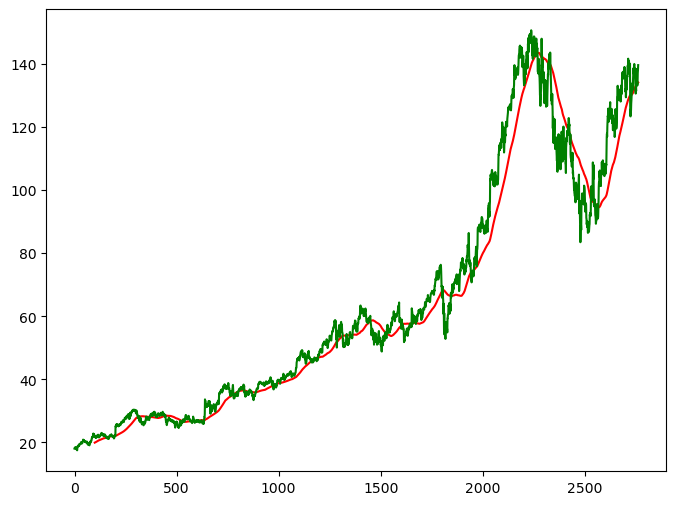

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,"r")
plt.plot(data.Close,"g")
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

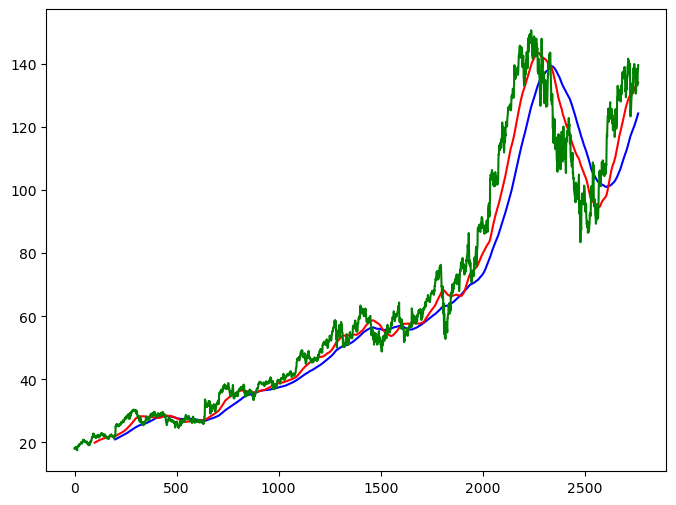

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days,"b")
plt.plot(ma_100_days,"r")
plt.plot(data.Close,"g")
plt.show()

In [10]:
data.dropna(inplace=True) # for null and missing values--- drop

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [12]:
data.shape

(2762, 7)

In [13]:
data_test.shape

(553, 1)

In [14]:
data_train.shape

(2209, 1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_train_scale = sc.fit_transform(data_train)

In [16]:
x = []
y = []
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    
x,y = np.array(x),np.array(y)

In [17]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential
from keras import initializers

In [18]:
recurrent_initializer = 'glorot_uniform'

In [25]:
model = Sequential()

model.add(LSTM(units=50,recurrent_initializer=recurrent_initializer,activation="relu",return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,recurrent_initializer=recurrent_initializer,activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,recurrent_initializer=recurrent_initializer,activation="relu",return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,recurrent_initializer=recurrent_initializer,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [26]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [27]:
model.fit(x, y, epochs=60, batch_size = 32 , verbose= 1 )

Epoch 1/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 179ms/step - loss: 0.0411
Epoch 2/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - loss: 0.0041
Epoch 3/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - loss: 0.0051
Epoch 4/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - loss: 0.0035
Epoch 5/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 0.0028
Epoch 6/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - loss: 0.0034
Epoch 7/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step - loss: 0.0035
Epoch 8/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 0.0029
Epoch 9/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - loss: 0.0027
Epoch 10/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0023
Epoch 11/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 0.0026
Epoch 12/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - loss: 0.0023
Epoch 13/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0023
Epoch 14/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 0.0026
Epoch 15/60
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [29]:
past_100_days = data_train.tail(100)

In [30]:

data_test = pd.concat([past_100_days , data_test], ignore_index = True)

In [31]:
data_test.shape

(653, 1)

In [32]:
data_test_scaled = sc.fit_transform(data_test)

In [33]:
x = []
y = []
for i in range(100,data_test_scaled.shape[0]):
    x.append(data_test_scaled[i-100:i])
    y.append(data_test_scaled[i,0])
    
x,y = np.array(x),np.array(y)

In [34]:
y_pred = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step


In [35]:
scale = 1/sc.scale_

In [36]:
y_pred = y_pred*scale

In [37]:
y  = y * scale

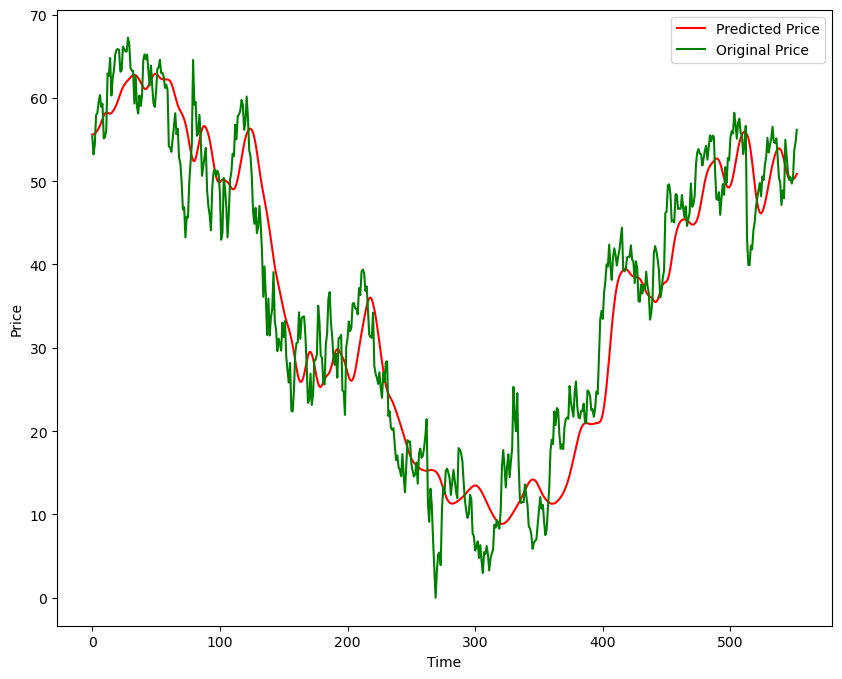

In [38]:
plt.figure(figsize = (10,8))
plt.plot(y_pred, "r", label = "Predicted Price")
plt.plot(y, "g", label = "Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [39]:
model.save("Stock_Prediction_Model_Final.keras")